# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# Distribution of body temperature

In [2]:
# import important libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of body temperature among population')

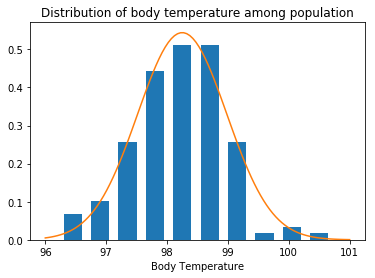

In [4]:
plt.hist(df.temperature,width=0.3,normed=True)
xs = np.linspace(96, 101, 100)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = norm.pdf(xs, temp_mean, temp_std)
plt.plot(xs, pdf)
plt.xlabel('Body Temperature')
plt.title('Distribution of body temperature among population')

In [5]:
import scipy.stats as stats

# Hypothesis testing for normality
# Hypothesis: Population is normally distributed

nt = stats.mstats.normaltest(df['temperature']) 
print('The z-statstic of the normality test is {:1.3f} with a p-value of {:1.3f}.'.format(nt[0],nt[1]))

The z-statstic of the normality test is 2.704 with a p-value of 0.259.


The z-statistic of 2.704 determines the confidence interval of more than 99% and p-value is more than alpha of 1% and hence null hypothesis is accepted i.e. Population is normally distributed

# Sample Size

In [6]:
# Check sample size
df.shape

(130, 3)

** Is sample size large enough? **
The sample has 130 observations. For normal distribution, sample greater than 30 is considered to be large enough to make it fit for normal distribution. Hence, yes data is large enough.

**Are observations independent**

We assume that observations are independent as no other variable is given to link dependency of one observation to another.


# True mean of population

In [9]:
# bootstrap sampling
#3. Is the True Population mean really 98.6 degrees F?
dfmean = df.temperature.mean()
print(dfmean)

98.24923076923078


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


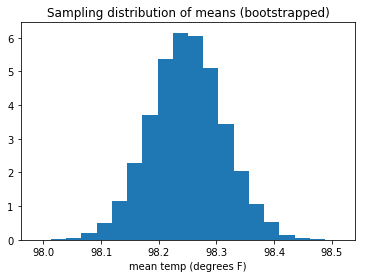

In [11]:
# Random sample to get a vector of mean temperatures
def bootstrap_mean(data, nSample, niter=10000):
    mean_list = []
    np.random.seed(100)

    for i in range(niter):
        sample = np.random.choice(data, size = nSample)
        mean_list.append(np.mean(sample))

    # Convert to series
    series = pd.Series(mean_list)

    return series

mean_temp = bootstrap_mean(df.temperature, 130)
#histogram
_ = plt.hist(mean_temp, bins = 20, normed=True)
_ = plt.title("Sampling distribution of means (bootstrapped)")
_ = plt.xlabel('mean temp (degrees F)')
plt.show()

In [7]:
# Since we do not know the population standard deviation, we will use t-statistic. 

n = len(df.temperature)
se = temp_std/np.sqrt(n)

t_stat = (temp_mean - 98.6)/se
p_value = stats.t.sf(np.abs(t_stat), n-1)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat, p_value))

The t-statistic is -5.455 and the p-value is 0.0000002


In [8]:

# Now if we use z-statistic, the result will be similar because the sample size is quite large.
# As sample size increases, t ditribution approaches the standard normal z distribution.

z_stat = (temp_mean - 98.6)/se
p_val = stats.norm.sf(np.abs(z_stat))*2
print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z_stat, p_val))

The z-statistic is -5.455 and the p-value is 0.00000005


Our z/t-value is way off our expected 1.96 for 95% confidence so we can determine our null hypothesis is false, the true population mean temperature is most likely not 98.6 degrees F.

# At what temperature should we consider someone's temperature to be "abnormal"?

We'll go back to our bootstrapped data for this. The 95% confidence interval places the average temperature in the range of 98.1 to 98.4 (see below), any temperatures above or below that can be considered abnormal.

In [13]:
#confidence interval
confint = np.percentile(mean_temp, [2.5, 97.5])
print('95% confidence interval:', confint)

95% confidence interval: [98.12384615 98.37615385]


###### Is there a significant difference between males and females in normal temperature? We can see below that there is a significant difference but we'll want to use a 2-sample test to prove it.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


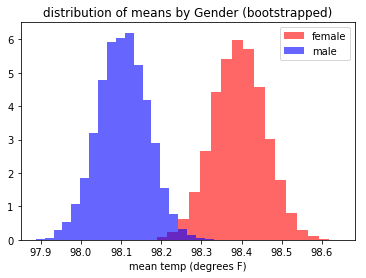

male 95% conf:  [97.98230769 98.22307692]
female 95% conf:  [98.26921154 98.51923077]


In [14]:
data_f = df[df.gender == 'F'].temperature
data_m = df[df.gender == 'M'].temperature

means_f = bootstrap_mean(data_f, 130)
means_m = bootstrap_mean(data_m, 130)

#histogram
_ = plt.hist(means_f, bins = 20, normed=True, color='red', alpha = .6, label='female')
_ = plt.hist(means_m, bins = 20, normed=True, color='blue', alpha = .6, label='male')
_ = plt.title("distribution of means by Gender (bootstrapped)")
_ = plt.xlabel('mean temp (degrees F)')
_ = plt.legend()

plt.show()

male_conf = np.percentile(means_m, [2.5, 97.5])
female_conf = np.percentile(means_f, [2.5, 97.5])

print('male 95% conf: ', male_conf)
print('female 95% conf: ', female_conf)

In [15]:
#we want to test null hypothesis that males and females have same mean temp
#first shift the mean of our two sample sets to match the mean of the set as a while
data_f_shifted = data_f - data_f.mean() + dfmean
data_m_shifted = data_m - data_m.mean() + dfmean
#get new bootstrapped means
means_f = bootstrap_mean(data_f_shifted, 130)
means_m = bootstrap_mean(data_m_shifted, 130)

#get original diff of means to test against
sample_diff_mean= data_f.mean() - data_m.mean()
diff_means = means_f-means_m
p_value = np.sum(diff_means >= sample_diff_mean)/(len(diff_means))
print('p_value = ', p_value)

p_value =  0.0006


Our p-value is very low, meaning the mean temp between males and females is significantly different in our data set.

Using sample data from 130 people, the average body temperature was found to be between 98.12 and 98.38 with 95% confidence. Our data also shows that there is statistical significance between male and female body temperature and females typically have a higher body temperature than males.